<a href="https://colab.research.google.com/github/ViniciusPrincipe/AutismoAdulto/blob/main/Autismo_Adulto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

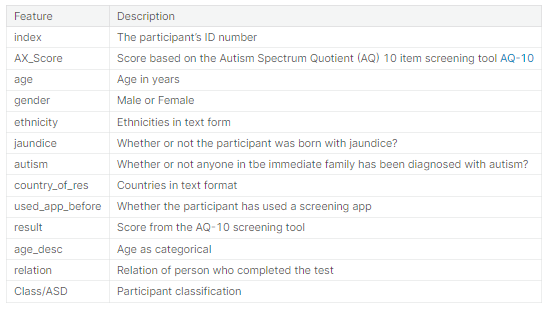

### Auto Eda

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()


def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()

    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()

    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")


def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()


def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")

    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)

    # EDA of numeric data
    numeric_eda(df)

    # Plot time series plot of numeric data
    time_series_plot(df)

## Entendendo o dataset

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/autism_screening.csv")

In [ ]:
dataset.head(4)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO


In [ ]:
dataset.rename(columns= {"contry_of_res" : "country", "jundice": "jaundice","austim": "autism"},inplace = True)

In [ ]:
question_mark_counts = (dataset == '?').sum()
print(question_mark_counts)

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jaundice            0
autism              0
country             0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [ ]:
dataset["ethnicity"].value_counts()

White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [ ]:
dataset["country"].value_counts()

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: country, Length: 67, dtype: int64

In [ ]:
selecao = dataset["country"] == "Jordan"
dataset[selecao].ethnicity.value_counts()

?                  42
Middle Eastern      5
Name: ethnicity, dtype: int64

Transformar dados categóricos em dados numéricos

In [ ]:
dataset['autism'] = dataset.autism.map(dict(yes=1, no=0))
dataset['jaundice'] = dataset.jaundice.map(dict(yes=1, no=0))
dataset['gender'] = dataset.gender.map(dict(f = 1, m = 0))
dataset['relation'] = dataset.relation.map({'Self' : 0 ,'Parent' : 1,'Relative' : 2, 'Others' : 3,'Health care professional' : 4,'?': 5})
dataset['used_app_before'] = dataset.used_app_before.map(dict(yes=1, no=0))

Preview of data:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,1,White-European,0,0,United States,0,6.0,18 and more,0,NO
1,1,1,0,1,0,0,0,1,0,1,...,0,Latino,0,1,Brazil,0,5.0,18 and more,0,NO
2,1,1,0,1,1,0,1,1,1,1,...,0,Latino,1,1,Spain,0,8.0,18 and more,1,YES



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    int64  
 12  ethnicity        704 non-null    object 
 13  jaundice         704 non-null    int64  
 14  autism           704 non-null    int64  
 15  country          704 non-

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,...,0,?,0,0,Saudi Arabia,0,0.0,18 and more,5,NO
91,0,1,0,0,1,0,1,0,0,1,...,1,?,0,0,Jordan,0,4.0,18 and more,5,NO


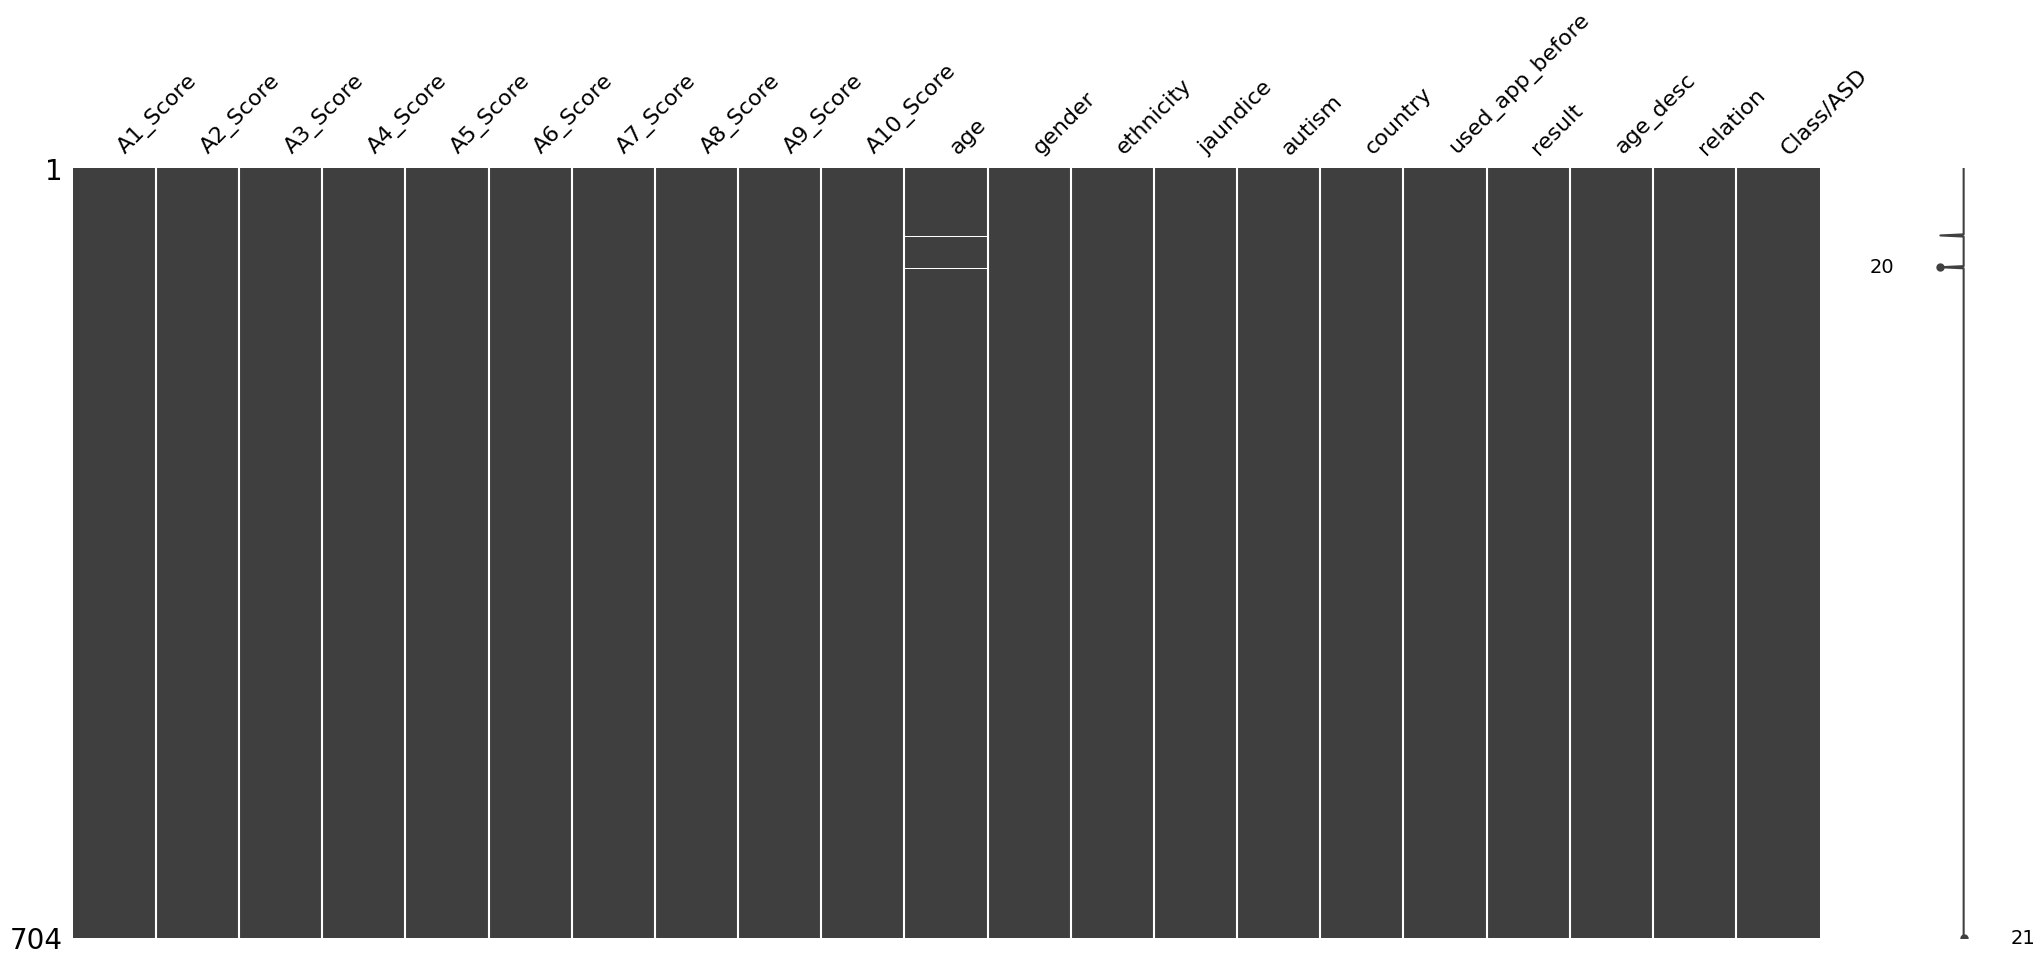


***Number of duplicated entries:  5


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
574,1,0,0,0,1,0,1,1,0,0,...,1,White-European,0,0,United States,0,4.0,18 and more,0,NO
575,1,0,0,0,1,0,1,1,0,0,...,1,White-European,0,0,United States,0,4.0,18 and more,0,NO
328,1,1,1,0,0,0,0,1,0,0,...,0,Middle Eastern,0,0,United Arab Emirates,0,4.0,18 and more,2,NO
330,1,1,1,0,0,0,0,1,0,0,...,0,Middle Eastern,0,0,United Arab Emirates,0,4.0,18 and more,2,NO
325,1,1,1,0,1,0,0,1,0,0,...,0,Middle Eastern,0,0,United Arab Emirates,0,5.0,18 and more,2,NO



To check: 
Unique count of non-numeric data

ethnicity    12
country      67
age_desc      1
Class/ASD     2
dtype: int64
Top 5 unique values of ethnicity
         ethnicity  Count
0   White-European    233
1            Asian    123
2                ?     95
3  Middle Eastern      92
4            Black     43
 
Top 5 unique values of country
                country  Count
0         United States    113
1  United Arab Emirates     82
2           New Zealand     81
3                 India     81
4        United Kingdom     77
 
Top 5 unique values of age_desc
      age_desc  Count
0  18 and more    704
 
Top 5 unique values of Class/ASD
  Class/ASD  Count
0        NO    515
1       YES    189
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


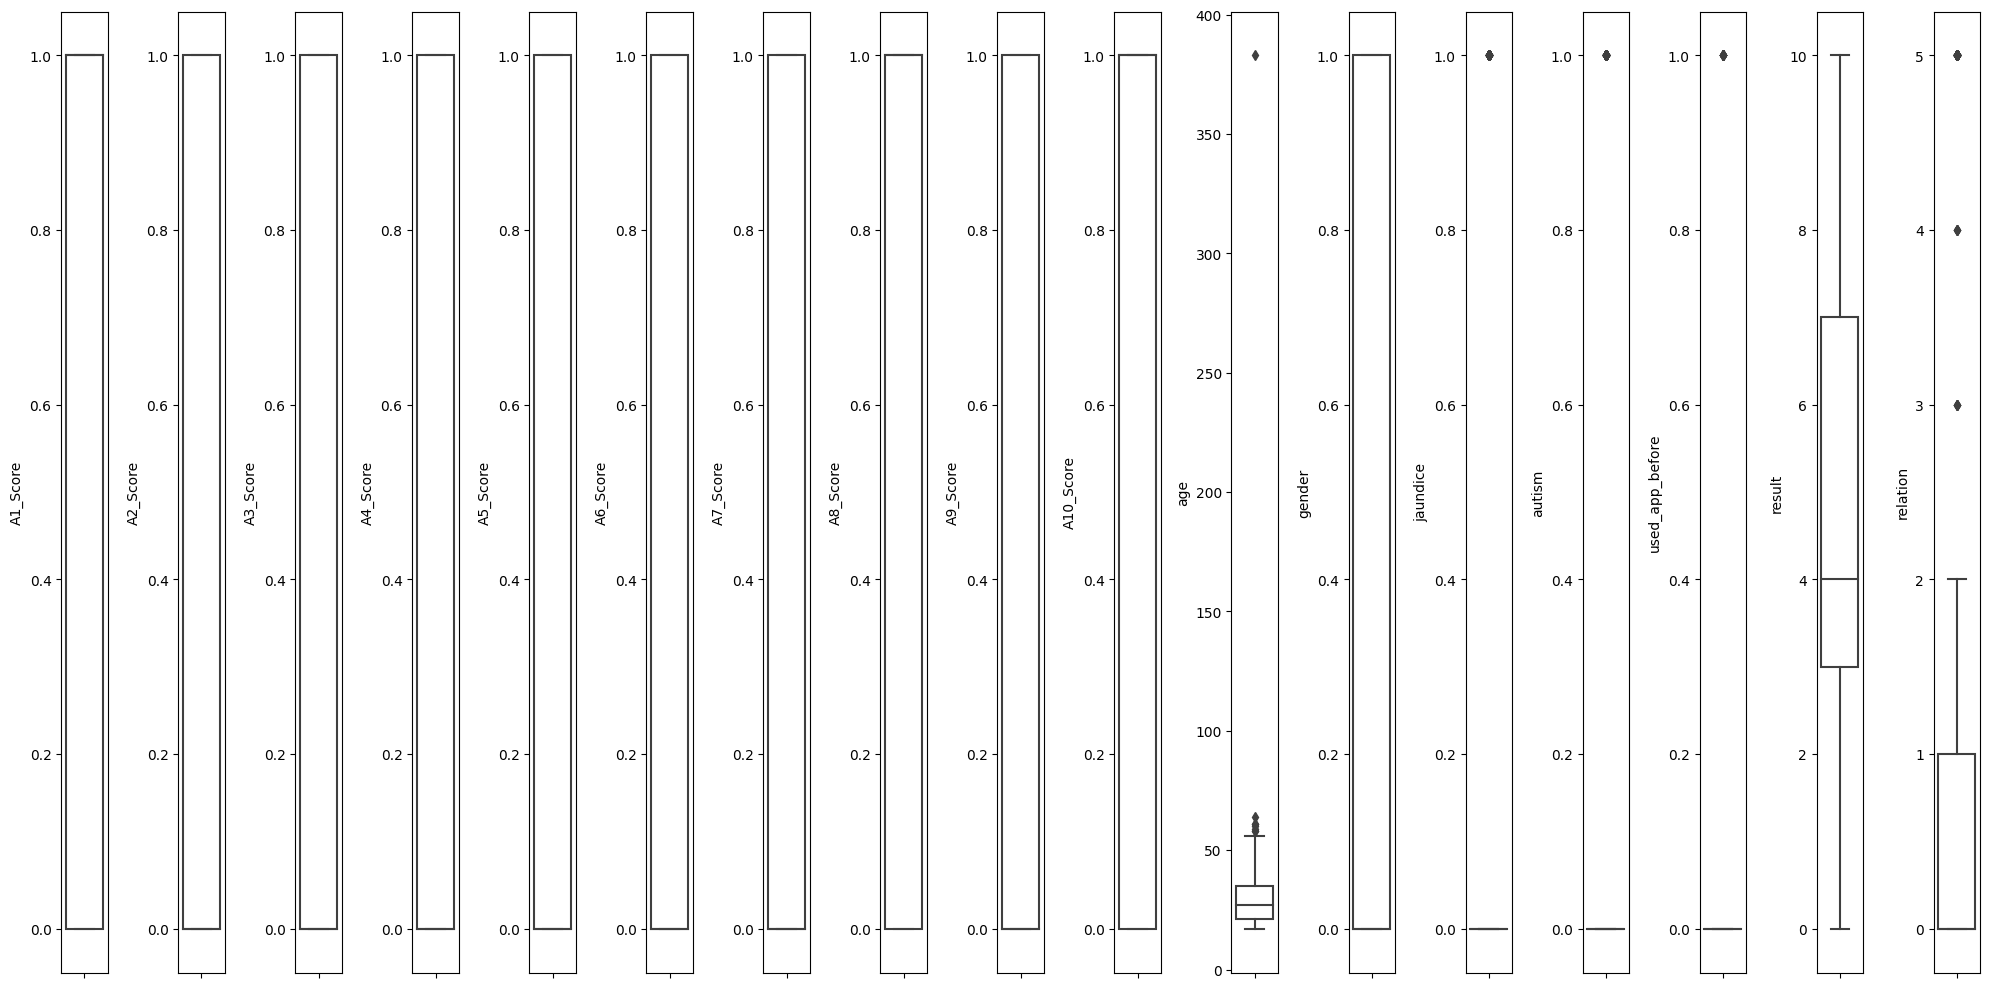


To check pairwise joint distribution of numeric data


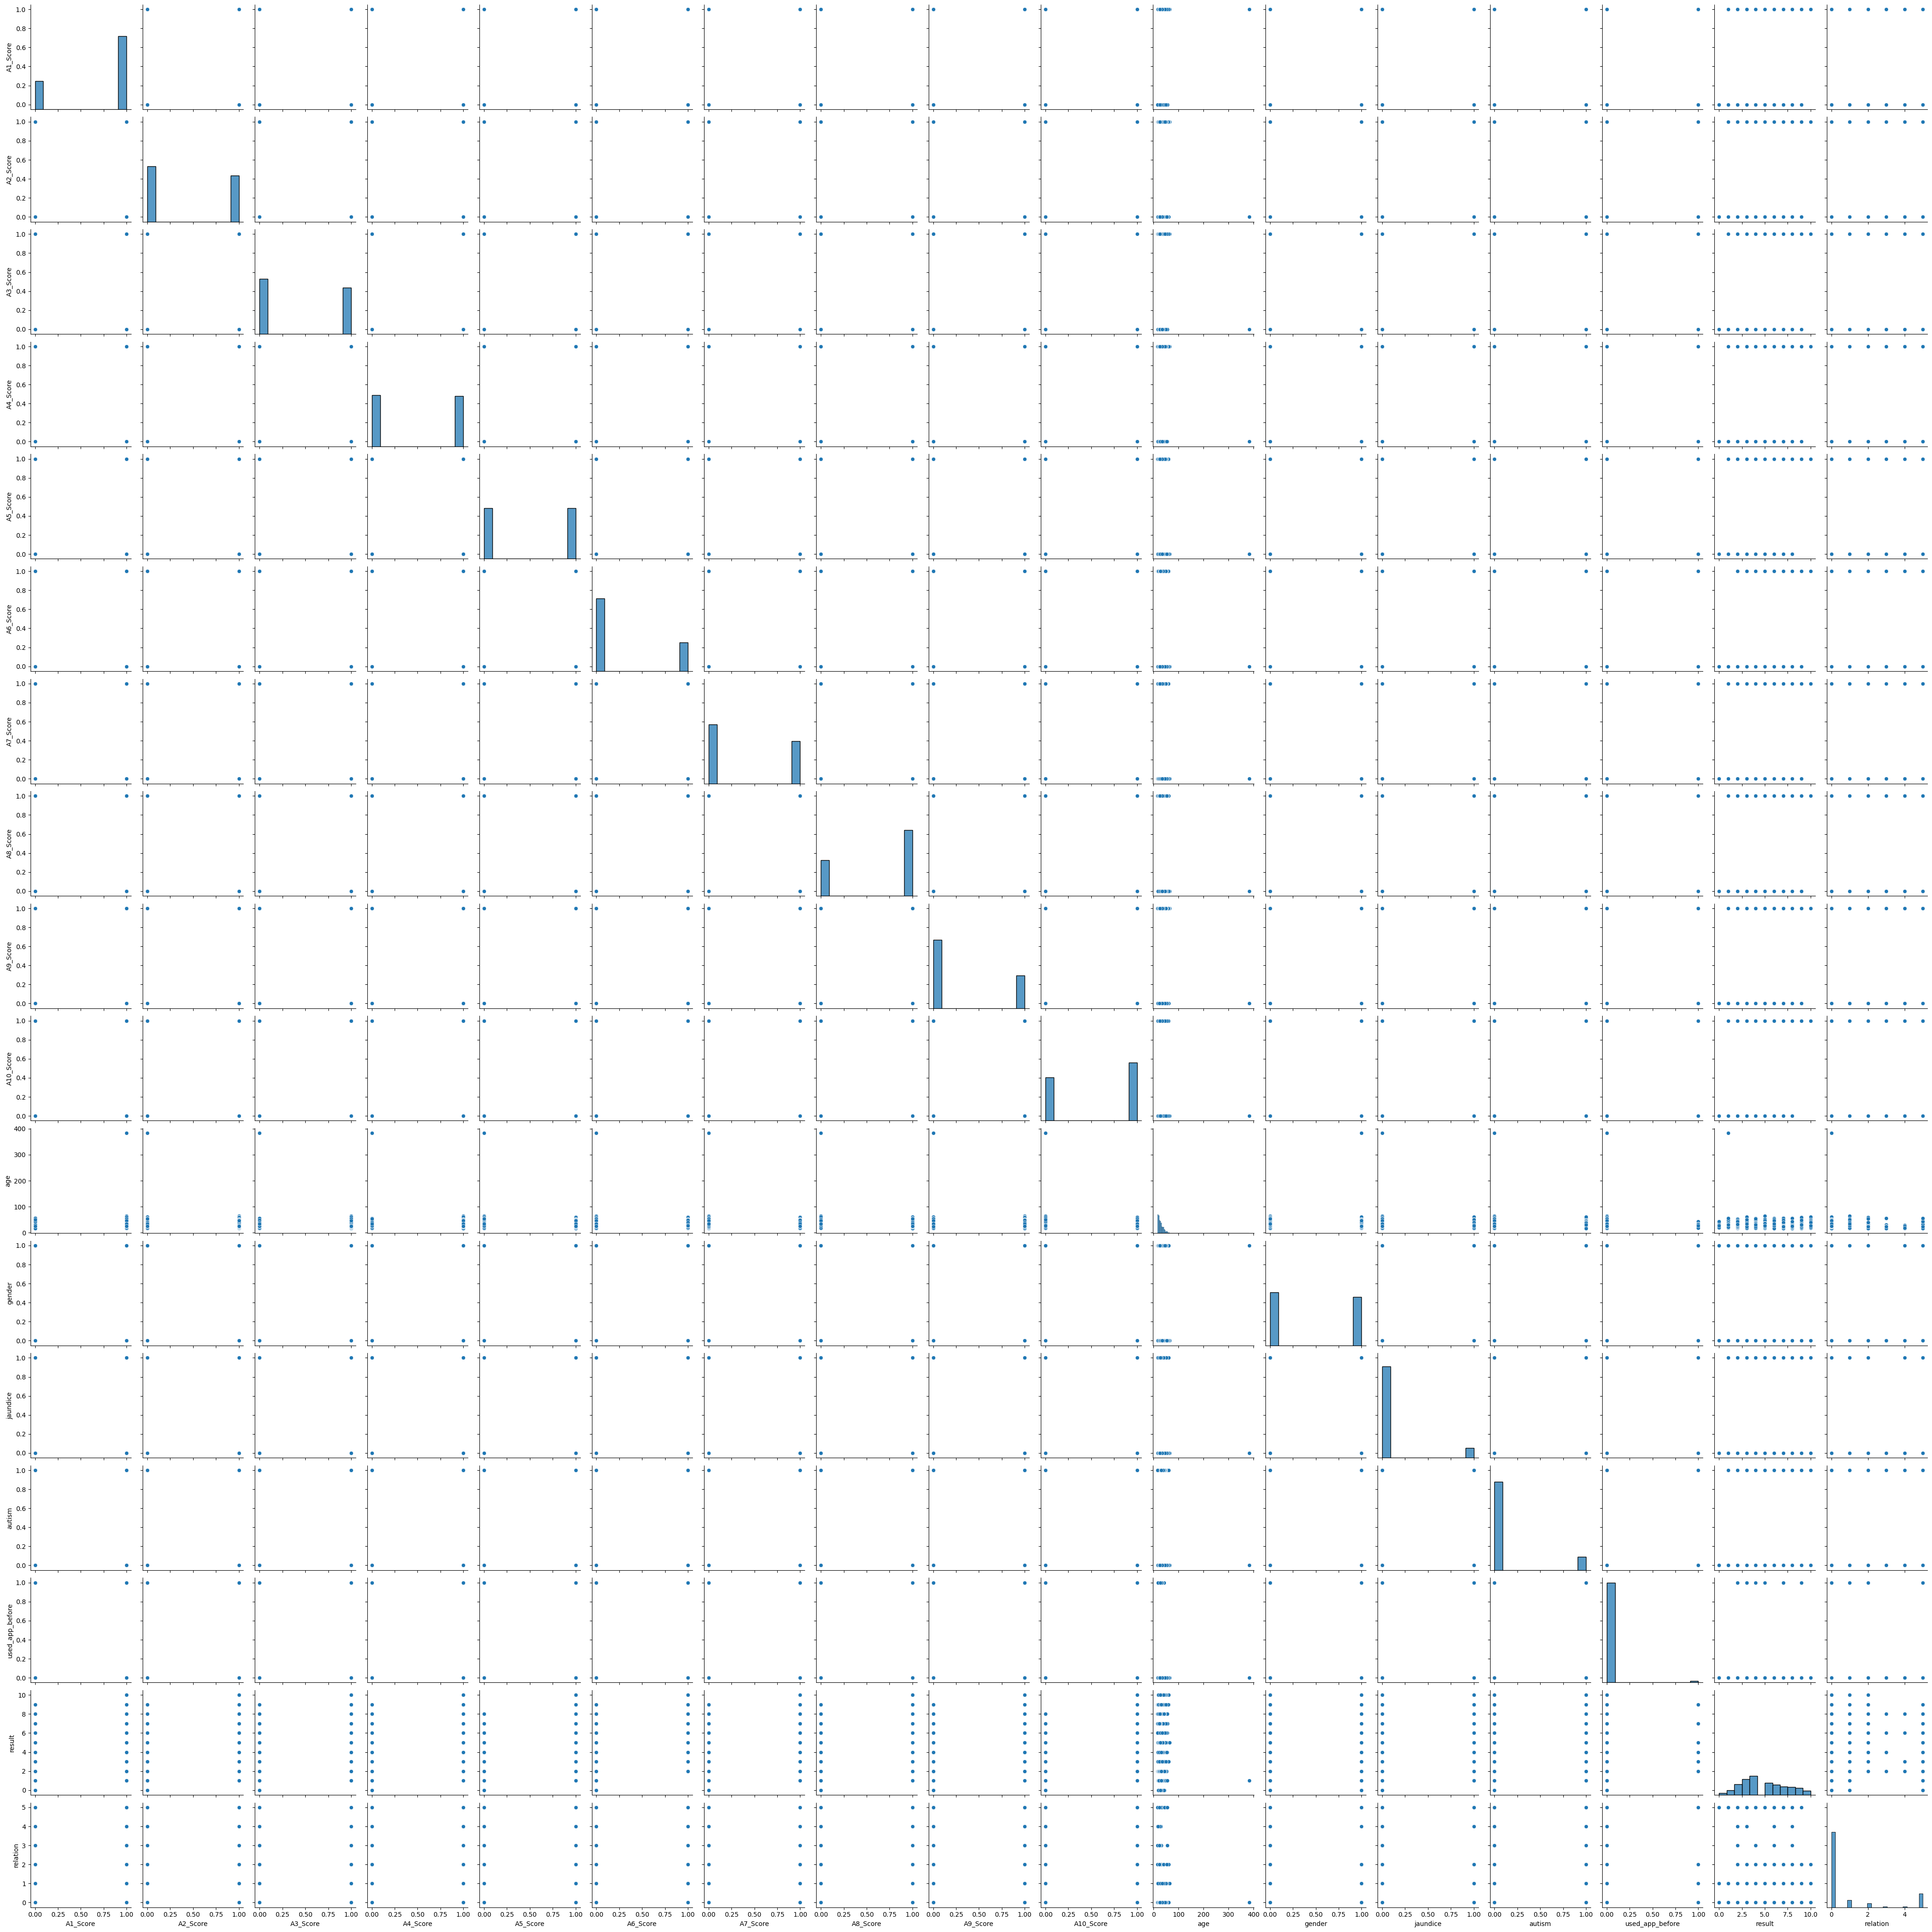


To check time series of numeric data  by daily, monthly and yearly frequency


In [ ]:
eda(dataset)

NO     515
YES    189
Name: Class/ASD, dtype: int64


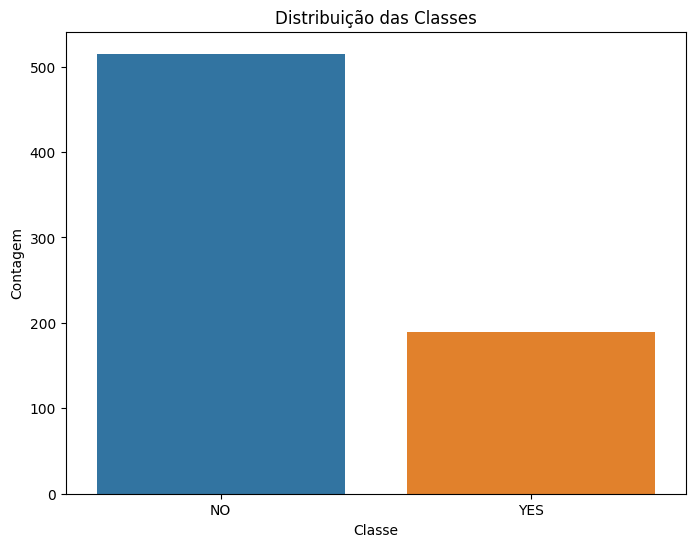

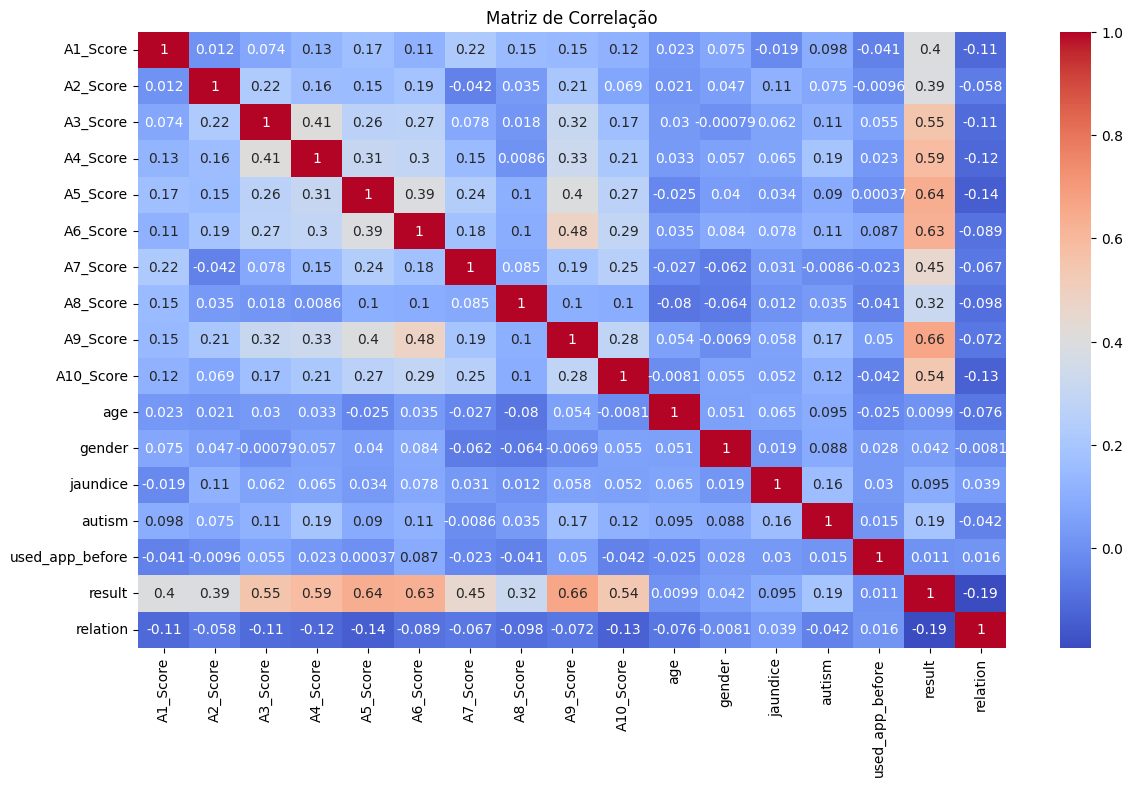

In [ ]:
# Contagem de amostras por classe
class_counts = dataset["Class/ASD"].value_counts()
print(class_counts)

# Gráfico de barras da distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x="Class/ASD")
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

# Matriz de correlação das variáveis numéricas
correlation_matrix = dataset.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
dataset["age_desc"].value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [ ]:
dataset["used_app_before"].value_counts()

0    692
1     12
Name: used_app_before, dtype: int64

## Manipulando dataset

In [ ]:
Y = dataset["Class/ASD"]
Y.head(4)

0     NO
1     NO
2    YES
3     NO
Name: Class/ASD, dtype: object

In [ ]:
dataset_limpo = dataset.drop(axis=1, columns = ["ethnicity","country","Class/ASD","age_desc","result"])

In [ ]:
dataset_limpo.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'autism', 'used_app_before', 'relation'],
      dtype='object')

In [ ]:
dataset_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    int64  
 12  jaundice         704 non-null    int64  
 13  autism           704 non-null    int64  
 14  used_app_before  704 non-null    int64  
 15  relation         704 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 88.1 KB


Novos valores dos atributos

* Familiar com autismo -> sim = 1, não = 0
*   Icterícia -> sim =1, não = 0
*   Genero -> feminino = 1, masculino = 0
* Relação com quem completou o teste -> O próprio = 0, Pais = 1, Parente = 2,  outros = 3, profissional da saúde = 4, resposta desconhecida = 5











In [ ]:
Y = Y.map({'YES':1, 'NO':0})

In [ ]:
dataset_limpo.relation.value_counts()

0    522
5     95
1     50
2     28
3      5
4      4
Name: relation, dtype: int64

In [ ]:
X= dataset_limpo

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

In [ ]:
X.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
jaundice           0
autism             0
used_app_before    0
relation           0
dtype: int64

In [ ]:
for x in X["age"]:
  if isinstance(x, float) == False:
    print(x)

In [ ]:
import numpy as np

In [ ]:
for index, x in X["age"].iteritems():
    if isinstance(x, float) and np.isnan(x):
        print(f"NaN value found at index {index}")

NaN value found at index 62
NaN value found at index 91


In [ ]:
X[X["age"]>100]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,used_app_before,relation
52,1,0,0,0,0,0,0,0,0,0,383.0,1,0,0,0,0


In [ ]:
X["age"][52] = 38
X["age"][62] = X.age.mean()
X["age"][91] = X.age.mean()

In [ ]:
scaler = MinMaxScaler()
X["age"] = scaler.fit_transform(X[['age']]).flatten()
X["relation"] = scaler.fit_transform(X[['relation']]).flatten()

## Resultado das perguntas

In [ ]:
dataset[dataset["Class/ASD"] == "NO"].result.value_counts()

4.0    131
3.0    110
5.0     83
2.0     74
6.0     70
1.0     33
0.0     14
Name: result, dtype: int64

In [ ]:
msg = "A"
msg_resto = "_Score"
for x in range(1,11):
  print(dataset[dataset["Class/ASD"] == "YES"][msg+str(x)+msg_resto].value_counts())

1    178
0     11
Name: A1_Score, dtype: int64
1    134
0     55
Name: A2_Score, dtype: int64
1    155
0     34
Name: A3_Score, dtype: int64
1    167
0     22
Name: A4_Score, dtype: int64
1    178
0     11
Name: A5_Score, dtype: int64
1    137
0     52
Name: A6_Score, dtype: int64
1    133
0     56
Name: A7_Score, dtype: int64
1    158
0     31
Name: A8_Score, dtype: int64
1    154
0     35
Name: A9_Score, dtype: int64
1    168
0     21
Name: A10_Score, dtype: int64


In [ ]:
msg = "A"
msg_resto = "_Score"
for x in range(1,11):
  print(dataset[dataset["Class/ASD"] == "NO"][msg+str(x)+msg_resto].value_counts())

1    330
0    185
Name: A1_Score, dtype: int64
0    330
1    185
Name: A2_Score, dtype: int64
0    348
1    167
Name: A3_Score, dtype: int64
0    333
1    182
Name: A4_Score, dtype: int64
0    342
1    173
Name: A5_Score, dtype: int64
0    452
1     63
Name: A6_Score, dtype: int64
0    354
1    161
Name: A7_Score, dtype: int64
1    299
0    216
Name: A8_Score, dtype: int64
0    441
1     74
Name: A9_Score, dtype: int64
0    279
1    236
Name: A10_Score, dtype: int64


In [ ]:
dataset[dataset["Class/ASD"] == "YES"]['A1_Score'].value_counts()

1    178
0     11
Name: A1_Score, dtype: int64

In [ ]:
selecao_no = (dataset["result"]>=7) & (dataset["Class/ASD"] == "YES")
selecao_yes = (dataset["result"]<7) & (dataset["Class/ASD"] == "YES")

len(dataset[selecao_no]),len(dataset[selecao_yes])

(189, 0)

In [ ]:
len(dataset[(dataset["jaundice"]==1) & (dataset["Class/ASD"]=="YES")])

28

In [ ]:
len(dataset[(dataset["autism"]==1) & (dataset["Class/ASD"]=="YES")])

43

In [ ]:
len(dataset[dataset["Class/ASD"]=="YES"])

189

Relação entre homens e mulheres no dataset. Lembrando -> Homem = 0; Mulher = 1

In [ ]:
dataset[(dataset["Class/ASD"]== "YES") ]["gender"].value_counts()

1    103
0     86
Name: gender, dtype: int64

In [ ]:
dataset["gender"].value_counts()

0    367
1    337
Name: gender, dtype: int64

In [ ]:
from tensorflow import keras
import tensorflow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state=42)

In [ ]:
batch_size = 32

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (16,)),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(1,activation = tensorflow.nn.sigmoid)
])

modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
early_stopping0 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
early_stopping1 = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=15, restore_best_weights=True)

In [ ]:
historico = modelo.fit(X_train,y_train,batch_size = batch_size,epochs = 200,validation_split = 0.2,callbacks=[early_stopping0,early_stopping1])

Epoch 1/200
15/15 [==============================] - 3s 25ms/step - loss: 0.8125 - accuracy: 0.2889 - val_loss: 0.7406 - val_accuracy: 0.2920
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.5044 - val_loss: 0.6562 - val_accuracy: 0.7080
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.7133 - val_loss: 0.6083 - val_accuracy: 0.8319
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5984 - accuracy: 0.7844 - val_loss: 0.5644 - val_accuracy: 0.8230
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5605 - accuracy: 0.7933 - val_loss: 0.5240 - val_accuracy: 0.8584
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.8222 - val_loss: 0.4868 - val_accuracy: 0.8938
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.8467 - val_loss: 0.4522 - val_accuracy: 0.9027
Epoch 8/200


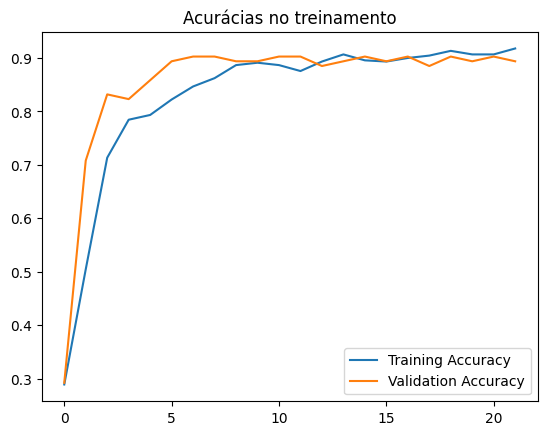

In [ ]:
plt.plot(historico.history['accuracy'],label = 'Training Accuracy')
plt.plot(historico.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Acurácias no treinamento")
plt.show()

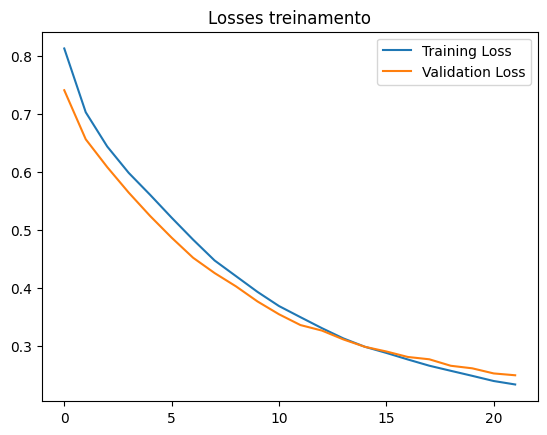

In [ ]:
plt.plot(historico.history['loss'], label='Training Loss')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.title("Losses treinamento")
plt.legend(loc="upper right")
plt.show()

Teste

In [ ]:
y_pred = np.where(modelo.predict(X_test) >= 0.5, 1 , 0)

5/5 [==============================] - 0s 4ms/step


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       105
           1       0.88      0.64      0.74        36

    accuracy                           0.89       141
   macro avg       0.89      0.81      0.83       141
weighted avg       0.89      0.89      0.88       141



In [ ]:
columns = ["A1_Score","A8_Score"]

In [ ]:
X_selected = X.drop(axis = 1, columns= columns)

In [ ]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, Y,test_size = 0.2, random_state=42)
batch_size = 32

In [ ]:
X_train_selected.columns

Index(['A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',
       'A9_Score', 'A10_Score', 'age', 'gender', 'jaundice', 'autism',
       'used_app_before', 'relation'],
      dtype='object')

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (14,)),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(1,activation = tensorflow.nn.sigmoid)
])

modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
early_stopping0 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
early_stopping1 = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=55, restore_best_weights=True)

In [ ]:
historico = modelo.fit(X_train_selected,y_train,batch_size = batch_size,epochs = 200,validation_split = 0.2,callbacks=[early_stopping0,early_stopping1])

Epoch 1/200
15/15 [==============================] - 1s 25ms/step - loss: 0.6945 - accuracy: 0.5378 - val_loss: 0.6578 - val_accuracy: 0.6903
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.7400 - val_loss: 0.6114 - val_accuracy: 0.8938
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6047 - accuracy: 0.8222 - val_loss: 0.5673 - val_accuracy: 0.8938
Epoch 4/200
15/15 [==============================] - 0s 9ms/step - loss: 0.5646 - accuracy: 0.8511 - val_loss: 0.5249 - val_accuracy: 0.9027
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5236 - accuracy: 0.8578 - val_loss: 0.4827 - val_accuracy: 0.9027
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.8600 - val_loss: 0.4422 - val_accuracy: 0.9027
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4462 - accuracy: 0.8644 - val_loss: 0.4077 - val_accuracy: 0.9115
Epoch 8/200


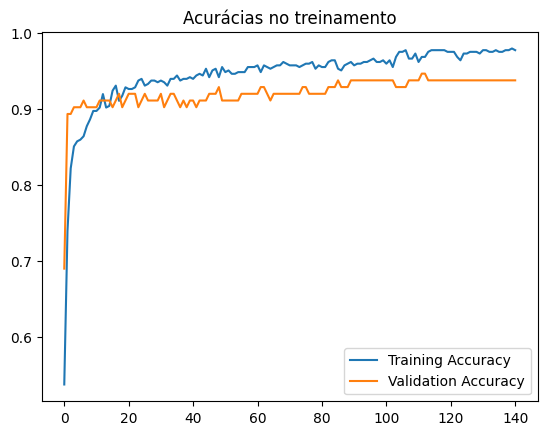

In [ ]:
plt.plot(historico.history['accuracy'],label = 'Training Accuracy')
plt.plot(historico.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Acurácias no treinamento")
plt.show()

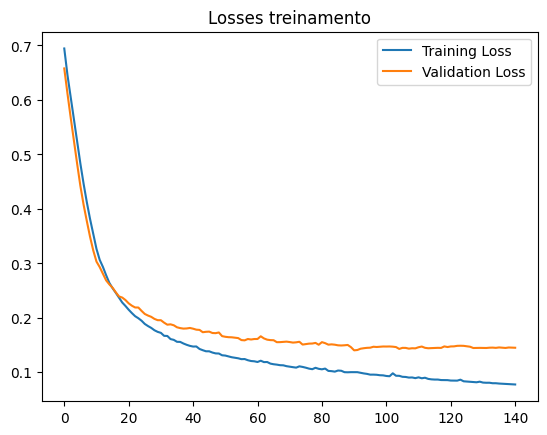

In [ ]:
plt.plot(historico.history['loss'], label='Training Loss')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.title("Losses treinamento")
plt.legend(loc="upper right")
plt.show()

In [ ]:
y_pred = np.where(modelo.predict(X_test_selected) >= 0.5, 1 , 0)
report = classification_report(y_test,y_pred)
print(report)

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.94      0.86      0.90        36

    accuracy                           0.95       141
   macro avg       0.95      0.92      0.93       141
weighted avg       0.95      0.95      0.95       141



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Calcule a acurácia
report= classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.97      0.96        36

    accuracy                           0.98       141
   macro avg       0.97      0.98      0.97       141
weighted avg       0.98      0.98      0.98       141



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_selected, y_train)
y_pred = tree_classifier.predict(X_test_selected)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.82      0.86      0.84        36

    accuracy                           0.91       141
   macro avg       0.88      0.90      0.89       141
weighted avg       0.92      0.91      0.92       141



## Random Forest

Grid search para procurar a melhor combinação de parâmetros

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier(random_state=42)


param_rfc = {

             'n_estimators' : [100,200,700,500,1000,2000],
             'criterion' : ['gini','entropy'],
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_rfc,cv = 5,scoring = "accuracy" )

grid_search.fit(X_train_selected,y_train)

print("Melhores hiperparâmetros: ")
print(grid_search.best_params_)

best_rfc = grid_search.best_estimator_

cv_scores = cross_val_score(best_rfc, X_train_selected, y_train, cv=5)

best_rfc.fit(X_train_selected, y_train)
y_pred = best_rfc.predict(X_test_selected)
report = classification_report(y_test, y_pred)

print(f"Valores cross-validation: {cv_scores}")
print("\n"+ f"Valor médio de Cross-validation: {cv_scores.mean():.2f}"+ "\n")
print(report)

Melhores hiperparâmetros: 
{'criterion': 'entropy', 'n_estimators': 700}
Valores cross-validation: [0.9380531  0.92035398 0.92035398 0.92857143 0.95535714]

Valor médio de Cross-validation: 0.93

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.92      0.94      0.93        36

    accuracy                           0.96       141
   macro avg       0.95      0.96      0.95       141
weighted avg       0.96      0.96      0.96       141



Comitê de MLP's

In [ ]:
from sklearn.ensemble import VotingClassifier


mlp1 = MLPClassifier(random_state=42)
mlp2 = MLPClassifier(random_state=42)
mlp3 = MLPClassifier(random_state=42)

# Criação do comitê
estimators = [
    ('mlp1', mlp1),
    ('mlp2', mlp2),
    ('mlp3', mlp3)
]


voting_classifier = VotingClassifier(estimators=estimators, voting='hard')



voting_classifier.fit(X_train_selected, y_train)
y_pred = voting_classifier.predict(X_test_selected)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.92      0.92      0.92        36

    accuracy                           0.96       141
   macro avg       0.94      0.94      0.94       141
weighted avg       0.96      0.96      0.96       141



## Cluster

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X_temp = X.columns
age = X["age"]
gender = X["gender"]

In [ ]:
X_cluster = X.drop(axis = 1, columns = ["used_app_before","age","gender","relation"])

In [ ]:
X_cluster_final = X_cluster.values

# Choose the number of clusters (you should adjust this based on your data and problem)
n_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_cluster_final)

X_cluster["Cluster"] = kmeans.labels_



In [ ]:
X_cluster["Class"] = Y
X_cluster["Gender"] = gender
X_cluster["age"] = age

In [ ]:
cluster_class_distribution = X_cluster.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)

Distribuição de autismo por núcleo

In [ ]:
cluster_class_distribution

Class,0,1
Cluster,,
0,213,5
1,36,184
2,266,0


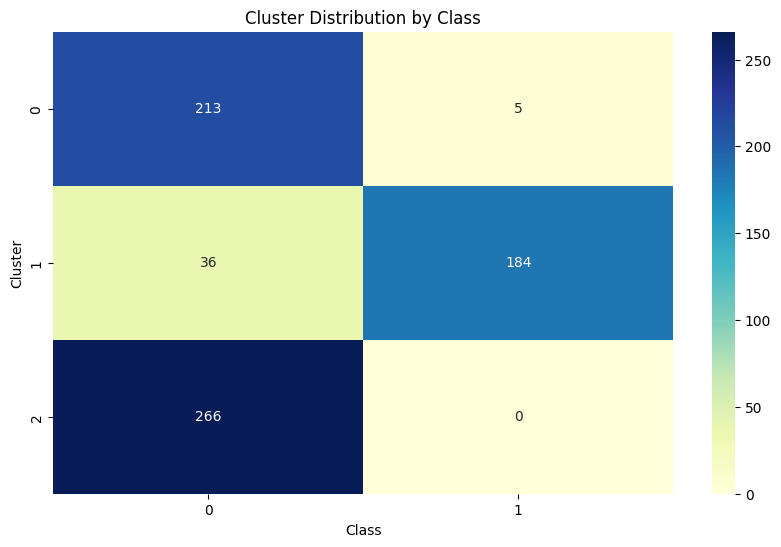

In [ ]:

# Create a cluster distribution heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_class_distribution, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Cluster')
plt.title('Cluster Distribution by Class')

# Show the plot
plt.show()


distribuição de autistas e ictericia por grupo

In [ ]:
X_cluster[(X_cluster['jaundice']==1) & (X_cluster["Class"]==1)]["Cluster"].value_counts()

1    28
Name: Cluster, dtype: int64

In [ ]:
#sem ictericia
X_cluster[(X_cluster['jaundice']==0) & (X_cluster["Class"]==1)]["Cluster"].value_counts()

1    156
0      5
Name: Cluster, dtype: int64

In [ ]:
X_cluster[(X_cluster['jaundice']==1) & (X_cluster["Class"]==0)]["Cluster"].value_counts()

0    19
2    18
1     4
Name: Cluster, dtype: int64

levando em conta a relação com o preenchedor do uestionário

In [ ]:
X_cluster

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,jaundice,autism,Cluster,Class,Gender,age
0,1,1,1,1,0,0,1,1,0,0,0,0,2,0,1,0.191489
1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0.148936
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0.212766
3,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0.382979
4,1,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0.489362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0.170213
700,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.361702
701,1,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0.148936
702,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0.382979


Parentes com autismo de pessoas notificadas como negativo

In [ ]:
X_cluster[(X_cluster["Class"] == 0)  & (X_cluster["autism"])]["Cluster"].value_counts()

0    22
2    19
1     7
Name: Cluster, dtype: int64

parentes autistas em autistas

In [ ]:
X_cluster[(X_cluster["Class"] == 1)  & (X_cluster["autism"])]["Cluster"].value_counts()

1    43
Name: Cluster, dtype: int64

In [ ]:
X_cluster[(X_cluster["Class"] == 1)  & (X_cluster["autism"]==0)]["Cluster"].value_counts()

1    141
0      5
Name: Cluster, dtype: int64

In [ ]:
soma = 0
for col in X_cluster.iloc[:, :10]:
  soma = soma + X_cluster[col]
X_cluster["Result"] = soma

Pais não autistas, filho autista, cluster 0

In [ ]:
X_cluster[(X_cluster["Class"] == 1)  & (X_cluster["autism"]==0) & (X_cluster["Cluster"]==0)]["Result"]

107    7
125    7
148    7
218    7
265    7
Name: Result, dtype: int64

In [ ]:
X_cluster[(X_cluster['Class']==0) & (X_cluster["Cluster"]==1)]["Result"].value_counts()

6    30
5     6
Name: Result, dtype: int64

In [ ]:
X_cluster[(X_cluster['Class']==0) & (X_cluster["Cluster"]==2)]["Result"].value_counts()

3    70
2    60
4    54
1    32
5    27
0    14
6     9
Name: Result, dtype: int64

In [ ]:
X_cluster[(X_cluster['Class']==0) & (X_cluster["Cluster"]==0)]["Result"].value_counts()

4    77
5    50
3    40
6    31
2    14
1     1
Name: Result, dtype: int64

In [ ]:
X_cluster["Result"].value_counts()

4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: Result, dtype: int64